# 김홍선 감독 작품 영화평 Set

1. 영화평 크롤링 작업

1) 작품 '변신'

In [50]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

In [3]:
adr = 'https://movie.daum.net/moviedb/grade?movieId=126721&type=netizen&page={}'

In [4]:
review_list = []

for n in range(50):
    url = adr.format(n+1)
    webpage = urlopen(url)
    soup = BeautifulSoup(webpage, 'html.parser')
    reviews = soup.findAll('p',{'class':'desc_review'})
    for review in reviews:
        review_list.append(review.get_text().strip())

In [5]:
review_list

['',
 '뭐냐 이게...',
 '초반부는 상당히 무섭고 재밌다\r배우들 연기도 상당히 뛰어나서 몰입도가 높음\r후반부가 개연성이 억지스로워져서 아쉽다\r왜 창고에 혼자 내려보냇는지 부터 슬슬 불길한 조짐을 느낌 그래도 공포가뭄인 한국영화에서\r볼만한 작품',
 '한물간 액소시즘을 살려보려고 애는썼다\r국내 공포물중에서는\r가장 좋았던건 같다\r연출 ㆍ연기 모두 괜찮은 영화',
 'ㄱㄲㅈ',
 '초반 : 아.. 오늘 잠 다잤다.\r후반 : 오늘 잠 잘 오겠다.\r 시도는 좋았으나 구성이 너무 아쉽다.\r회수 못한 떡밥이 한두개가 아니고 초중반에 긴장감 조성하는걸 좀 짧게 가져갔으면 이렇게 조급하게 마무리하지 않아도 됐을 것 같다. 아쉽다.',
 '조금 아쉽다.  옆집, 백윤식 씬을 없애고 스토리를 더 넣었으면... 이런 장르 많이 나오길 기대합니다. 시도에 점수를 좀 더 줍니다.',
 '배우들이 아깝다.  긴장감없고 스토리전개 넘 엉성하고...',
 '재미만 있구만..\r시작부터 지루할틈 없이 ...',
 '재미는 있음 \r그나저나 성동일은 딸과 동생을 죽인 살인범으로 처벌 받는건 아닌지 걱정되네 \r그리고 항상 느끼는 거지만 이런 테마가 주제인 영화는 꼭 악마의 힘이 쎔 \r악마에게 전혀 피해 없이 신이 멋지게 악마를 무찌르는 모습을 보여 준 적이 없음',
 '좋은 사람들 모아놓고 힘없는 시나리오를 던져줬다. 엑스트라의 연기에게까지 기대야만 하는 시나리오의 수준. 인과없는 사건과 느닷없는 이벤트가 몰입을 방해한다. 분장과 소품에 많은 신경을 썼으나 긴장감 없는 구도와 조명으로 빛이 바랬다. 이상한 사물 뒤에 자꾸 숨는 카메라. 연출력도 낮아서 이런 부족함을 이겨내지 못한다. 열심히 따라한 흔적만.',
 '이정도면 곡성급은 아니래두  사바하 검은사제들 사자등과 같은 공포 오컬트형 한국 영화중 수작이라 본다. 흡입력 좋다!!!',
 '볼만해요',
 '',
 '',
 '무서운걸 못보는 타입이라 그런지 처음부터 무섭게 나오는 방식이\r시선을 이끌기에 괜찮았던 것 

감정분석을 위해서 평점도 크롤링 진행(이후에)

In [251]:
score_list = []

for n in range(50):
    url = adr.format(n+1)
    webpage = urlopen(url)
    soup = BeautifulSoup(webpage, 'html.parser')
    scores = soup.findAll('em',{'class':'emph_grade'})
    for score in scores:
        score_list.append(score.get_text().strip())

In [252]:
score_list

['4',
 '5',
 '6',
 '6',
 '9',
 '6',
 '7',
 '0',
 '9',
 '8',
 '4',
 '9',
 '7',
 '1',
 '1',
 '7',
 '0',
 '3',
 '2',
 '10',
 '10',
 '2',
 '10',
 '5',
 '7',
 '1',
 '8',
 '6',
 '6',
 '1',
 '9',
 '1',
 '7',
 '1',
 '3',
 '3',
 '1',
 '0',
 '0',
 '1',
 '5',
 '2',
 '6',
 '5',
 '3',
 '1',
 '4',
 '5',
 '9',
 '3',
 '3',
 '0',
 '9',
 '5',
 '3',
 '3',
 '10',
 '5',
 '0',
 '7',
 '3',
 '5',
 '10',
 '2',
 '6',
 '9',
 '0',
 '4',
 '10',
 '9',
 '9',
 '3',
 '5',
 '10',
 '10',
 '3',
 '7',
 '3',
 '0',
 '7',
 '10',
 '2',
 '0',
 '3',
 '6',
 '8',
 '3',
 '1',
 '4',
 '5',
 '5',
 '9',
 '1',
 '1',
 '0',
 '2',
 '8',
 '7',
 '9',
 '10',
 '1',
 '3',
 '7',
 '0',
 '1',
 '4',
 '2',
 '0',
 '0',
 '7',
 '8',
 '9',
 '4',
 '10',
 '1',
 '5',
 '9',
 '1',
 '0',
 '3',
 '1',
 '0',
 '1',
 '0',
 '7',
 '1',
 '1',
 '3',
 '0',
 '1',
 '2',
 '6',
 '3',
 '1',
 '1',
 '7',
 '8',
 '1',
 '1',
 '2',
 '1',
 '1',
 '6',
 '5',
 '0',
 '1',
 '1',
 '1',
 '8',
 '8',
 '0',
 '5',
 '2',
 '1',
 '5',
 '1',
 '4',
 '4',
 '10',
 '0',
 '0',
 '1',
 '4',
 '8',
 '4'

In [9]:
len(score_list)

500

우측 공백 문자(\r)이 붙어 있어서 제거하기 위해서 For문 사용

In [106]:
변신_list=[]

for line in review_list:
    replace_line = line.replace("\r","")
    변신_list.append(replace_line)
변신_list

['',
 '뭐냐 이게...',
 '초반부는 상당히 무섭고 재밌다배우들 연기도 상당히 뛰어나서 몰입도가 높음후반부가 개연성이 억지스로워져서 아쉽다왜 창고에 혼자 내려보냇는지 부터 슬슬 불길한 조짐을 느낌 그래도 공포가뭄인 한국영화에서볼만한 작품',
 '한물간 액소시즘을 살려보려고 애는썼다국내 공포물중에서는가장 좋았던건 같다연출 ㆍ연기 모두 괜찮은 영화',
 'ㄱㄲㅈ',
 '초반 : 아.. 오늘 잠 다잤다.후반 : 오늘 잠 잘 오겠다. 시도는 좋았으나 구성이 너무 아쉽다.회수 못한 떡밥이 한두개가 아니고 초중반에 긴장감 조성하는걸 좀 짧게 가져갔으면 이렇게 조급하게 마무리하지 않아도 됐을 것 같다. 아쉽다.',
 '조금 아쉽다.  옆집, 백윤식 씬을 없애고 스토리를 더 넣었으면... 이런 장르 많이 나오길 기대합니다. 시도에 점수를 좀 더 줍니다.',
 '배우들이 아깝다.  긴장감없고 스토리전개 넘 엉성하고...',
 '재미만 있구만..시작부터 지루할틈 없이 ...',
 '재미는 있음 그나저나 성동일은 딸과 동생을 죽인 살인범으로 처벌 받는건 아닌지 걱정되네 그리고 항상 느끼는 거지만 이런 테마가 주제인 영화는 꼭 악마의 힘이 쎔 악마에게 전혀 피해 없이 신이 멋지게 악마를 무찌르는 모습을 보여 준 적이 없음',
 '좋은 사람들 모아놓고 힘없는 시나리오를 던져줬다. 엑스트라의 연기에게까지 기대야만 하는 시나리오의 수준. 인과없는 사건과 느닷없는 이벤트가 몰입을 방해한다. 분장과 소품에 많은 신경을 썼으나 긴장감 없는 구도와 조명으로 빛이 바랬다. 이상한 사물 뒤에 자꾸 숨는 카메라. 연출력도 낮아서 이런 부족함을 이겨내지 못한다. 열심히 따라한 흔적만.',
 '이정도면 곡성급은 아니래두  사바하 검은사제들 사자등과 같은 공포 오컬트형 한국 영화중 수작이라 본다. 흡입력 좋다!!!',
 '볼만해요',
 '',
 '',
 '무서운걸 못보는 타입이라 그런지 처음부터 무섭게 나오는 방식이시선을 이끌기에 괜찮았던 것 같네요.집중력 있는 초반에 비해지나갈수록 약간의 허무함

리스트 타입으로 불러왔기에 For문 돌려서 한글만 남기고 삭제

In [107]:
변신한글 = []

for i in range(0,len(변신_list)):
    text = 변신_list[i]
    text = re.sub("[^가-힣\s]",'',text)
    변신한글.append(text)
변신한글

['',
 '뭐냐 이게',
 '초반부는 상당히 무섭고 재밌다배우들 연기도 상당히 뛰어나서 몰입도가 높음후반부가 개연성이 억지스로워져서 아쉽다왜 창고에 혼자 내려보냇는지 부터 슬슬 불길한 조짐을 느낌 그래도 공포가뭄인 한국영화에서볼만한 작품',
 '한물간 액소시즘을 살려보려고 애는썼다국내 공포물중에서는가장 좋았던건 같다연출 연기 모두 괜찮은 영화',
 '',
 '초반  아 오늘 잠 다잤다후반  오늘 잠 잘 오겠다 시도는 좋았으나 구성이 너무 아쉽다회수 못한 떡밥이 한두개가 아니고 초중반에 긴장감 조성하는걸 좀 짧게 가져갔으면 이렇게 조급하게 마무리하지 않아도 됐을 것 같다 아쉽다',
 '조금 아쉽다  옆집 백윤식 씬을 없애고 스토리를 더 넣었으면 이런 장르 많이 나오길 기대합니다 시도에 점수를 좀 더 줍니다',
 '배우들이 아깝다  긴장감없고 스토리전개 넘 엉성하고',
 '재미만 있구만시작부터 지루할틈 없이 ',
 '재미는 있음 그나저나 성동일은 딸과 동생을 죽인 살인범으로 처벌 받는건 아닌지 걱정되네 그리고 항상 느끼는 거지만 이런 테마가 주제인 영화는 꼭 악마의 힘이 쎔 악마에게 전혀 피해 없이 신이 멋지게 악마를 무찌르는 모습을 보여 준 적이 없음',
 '좋은 사람들 모아놓고 힘없는 시나리오를 던져줬다 엑스트라의 연기에게까지 기대야만 하는 시나리오의 수준 인과없는 사건과 느닷없는 이벤트가 몰입을 방해한다 분장과 소품에 많은 신경을 썼으나 긴장감 없는 구도와 조명으로 빛이 바랬다 이상한 사물 뒤에 자꾸 숨는 카메라 연출력도 낮아서 이런 부족함을 이겨내지 못한다 열심히 따라한 흔적만',
 '이정도면 곡성급은 아니래두  사바하 검은사제들 사자등과 같은 공포 오컬트형 한국 영화중 수작이라 본다 흡입력 좋다',
 '볼만해요',
 '',
 '',
 '무서운걸 못보는 타입이라 그런지 처음부터 무섭게 나오는 방식이시선을 이끌기에 괜찮았던 것 같네요집중력 있는 초반에 비해지나갈수록 약간의 허무함이 있는 점은 아쉬웠던 것 같아요',
 '',
 '스토리 개연성 없음연기는 좋음

전처리를 해보고 싶어서 데이터프레임으로 변환

In [108]:
변신 = pd.DataFrame(변신한글)

In [114]:
변신.rename(columns={0:'감상평'},inplace=True)

In [110]:
점수 = pd.DataFrame(score_list)

In [115]:
점수.rename(columns={0:'평점'},inplace=True)

In [116]:
변신['평점'] =  점수['평점']

In [117]:
변신

,감상평,평점
0,,4
1,뭐냐 이게,5
2,초반부는 상당히 무섭고 재밌다배우들 연기도 상당히 뛰어나서 몰입도가 높음후반부가 개...,6
3,한물간 액소시즘을 살려보려고 애는썼다국내 공포물중에서는가장 좋았던건 같다연출 연기 ...,6
4,,9
...,...,...
495,아니 어떻게 처음부터 끝까지 무서울수있죠 이때까지 본 공포영화들은 무서운것도 아니라는,10
496,난 호러 싫고 종교도 없고 악마도 안믿는데 이건 올해 최고의 영화다 인정해버렸다,10
497,그냥 존나재밌고 존나무섭다 떨면서 본 공포 영화는 이게 처음,9
498,오프닝을 잊을 수 없다 여자애 너무 불쌍,9


공백값이 있음. Null은 아닌 것 같지만 일단 정제를 시작

In [118]:
변신.rename(columns={0:'감상평'},inplace=True) #열 이름 변경

In [119]:
변신

,감상평,평점
0,,4
1,뭐냐 이게,5
2,초반부는 상당히 무섭고 재밌다배우들 연기도 상당히 뛰어나서 몰입도가 높음후반부가 개...,6
3,한물간 액소시즘을 살려보려고 애는썼다국내 공포물중에서는가장 좋았던건 같다연출 연기 ...,6
4,,9
...,...,...
495,아니 어떻게 처음부터 끝까지 무서울수있죠 이때까지 본 공포영화들은 무서운것도 아니라는,10
496,난 호러 싫고 종교도 없고 악마도 안믿는데 이건 올해 최고의 영화다 인정해버렸다,10
497,그냥 존나재밌고 존나무섭다 떨면서 본 공포 영화는 이게 처음,9
498,오프닝을 잊을 수 없다 여자애 너무 불쌍,9


In [120]:
변신.isnull().values.any()

False

Null값이 없다고 나옴. 공백인 것 같아서 공백값을 찾아서 대체.

In [121]:
변신.replace("",float("NaN"),inplace=True)

In [122]:
변신.isnull().values.any() 

True

In [123]:
변신.dropna(how='any',inplace=True)

In [124]:
변신.isnull().values.any()

False

In [323]:
변신['평점'] = pd.to_numeric(변신['평점'])

In [364]:
변신['label'] = 0

In [365]:
변신

,감상평,평점,label
1,뭐냐 이게,5,0
2,초반부는 상당히 무섭고 재밌다배우들 연기도 상당히 뛰어나서 몰입도가 높음후반부가 개...,6,0
3,한물간 액소시즘을 살려보려고 애는썼다국내 공포물중에서는가장 좋았던건 같다연출 연기 ...,6,0
5,초반 아 오늘 잠 다잤다후반 오늘 잠 잘 오겠다 시도는 좋았으나 구성이 너무 아...,6,0
6,조금 아쉽다 옆집 백윤식 씬을 없애고 스토리를 더 넣었으면 이런 장르 많이 나오길...,7,0
...,...,...,...
495,아니 어떻게 처음부터 끝까지 무서울수있죠 이때까지 본 공포영화들은 무서운것도 아니라는,10,0
496,난 호러 싫고 종교도 없고 악마도 안믿는데 이건 올해 최고의 영화다 인정해버렸다,10,0
497,그냥 존나재밌고 존나무섭다 떨면서 본 공포 영화는 이게 처음,9,0
498,오프닝을 잊을 수 없다 여자애 너무 불쌍,9,0


In [363]:
변신['평점'].iloc[1]

6

In [378]:
for i in range(0,len(변신)):
    if 변신['평점'].iloc[i] > 5:
        변신['label'].iloc[i] = 1
    else:
        변신['label'].iloc[i] = 0        

In [379]:
변신

,감상평,평점,label
1,뭐냐 이게,5,0
2,초반부는 상당히 무섭고 재밌다배우들 연기도 상당히 뛰어나서 몰입도가 높음후반부가 개...,6,1
3,한물간 액소시즘을 살려보려고 애는썼다국내 공포물중에서는가장 좋았던건 같다연출 연기 ...,6,1
5,초반 아 오늘 잠 다잤다후반 오늘 잠 잘 오겠다 시도는 좋았으나 구성이 너무 아...,6,1
6,조금 아쉽다 옆집 백윤식 씬을 없애고 스토리를 더 넣었으면 이런 장르 많이 나오길...,7,1
...,...,...,...
495,아니 어떻게 처음부터 끝까지 무서울수있죠 이때까지 본 공포영화들은 무서운것도 아니라는,10,1
496,난 호러 싫고 종교도 없고 악마도 안믿는데 이건 올해 최고의 영화다 인정해버렸다,10,1
497,그냥 존나재밌고 존나무섭다 떨면서 본 공포 영화는 이게 처음,9,1
498,오프닝을 잊을 수 없다 여자애 너무 불쌍,9,1


나머지 2작품에 대해서도 동일한 코드로 작업 진행.

2) 기술자들

In [127]:
adr2 = 'https://movie.daum.net/moviedb/grade?movieId=82891&type=netizen&page={}'

In [128]:
review_list2 = []

for i in range(50):
    url = adr2.format(i+1)
    webpage = urlopen(url)
    soup = BeautifulSoup(webpage, 'html5lib')
    reviews = soup.findAll('p',{'class':'desc_review'})
    for review in reviews:
        review_list2.append(review.get_text().strip())

In [129]:
score_list2 = []

for n in range(50):
    url = adr2.format(n+1)
    webpage = urlopen(url)
    soup = BeautifulSoup(webpage, 'html.parser')
    scores = soup.findAll('em',{'class':'emph_grade'})
    for score in scores:
        score_list2.append(score.get_text().strip())

In [130]:
review_list2 # \n,\r이 있어서 둘 다 제거.

['음.. 기술자들도 끝까지 간다랑 꾼이랑 \n같은 반전인가?ㅋㅋ \n영화 전부 끝이 해피엔딩이라 좋네ㅋ \n세관에 폭발 시킨 후에 차 안에서 \n김영철 웃음소리ㅋㅋㅋ \n뭔가 따라웃게 됨ㅋㅋㅋ \n음하하하하하~ㅋㅋㅋ',
 '현우야  거들먹거린다고 양아치연기아님\n연기학원다녀라',
 '',
 '',
 '그냥 저냥 볼만한 정도. 헛점도 많다',
 '',
 '뭐 지금 영화랑비교하면 안되고 그래도 끝까지 재밌게보았어요',
 '',
 '최악 한국영화의 치욕.어설픈 연출. 맞지않은 배역.형사등등 ㅎ',
 '시간이 남아돌아도 보기싫어..',
 '연출이 엄청...구리다...',
 '시나리오는 엉성하나 명품배우들에 연기때문에 만점줌   이영화 배우빼면 아무것도 없음',
 '헐리웃 영화를 연상시키는 면면이 살짝 아쉽지만 볼만해요^-^♡',
 '통쾌한 기술자들을 액션 복수 반전극!',
 '나름 선전한 영화였습니다. ^^ 기존에 어디서 보던 느낌은 많이 났지만 뭐, 이정도면 나름 기본은 한 작품입니다. 다만 극장에서 감상하기엔 살짝 아쉬움은 있었습니다. 그 것 빼고는 다 괜찮네요. ^^',
 '아주 재밌습니다~!',
 '',
 '',
 '정말 재미있게 봤던 기억이 있습니다',
 '도둑들 흥행하니 감시자들,기술자들 비슷하게 쏟아져 나온것 같은 느낌적인느낌ㅋㅋ',
 '엉성',
 '재밌었다 반전의 반전이고 김우빈 존잘이다',
 '',
 '',
 '',
 '김우빈이 주인공이 되기에는 임팩트가 없는것같다',
 '똥폼 만 잡는 영화',
 '어린이 드라마 찍었구나~ 홍선아 어린이집이나 해라! 병.신새끼.',
 '김우빈의 역할이두 영화ㅡ 마스터와 기술자똑같네',
 '돈내고 보긴 아까운 영화',
 '',
 '그냥 그런 영화.',
 '',
 '졸잼',
 '그냥 멋있게 보라는 강요',
 '이런 류의 영화를 봤던 사람에게는 너무 너무 뻔했다. 배우들의 연기도 두드러지지 못했고 이건 배우보다 감독탓.',
 '',
 '',
 '괜찮게 봤었다. 한가지 아쉬운건 미화한다는 느낌?',
 '',
 '.',
 '

In [131]:
기술자들_list=[]

for line in review_list2:
    replace_line = line.replace("\r","")
    replace_line = line.replace("\n","")
    기술자들_list.append(replace_line)
기술자들_list

['음.. 기술자들도 끝까지 간다랑 꾼이랑 같은 반전인가?ㅋㅋ 영화 전부 끝이 해피엔딩이라 좋네ㅋ 세관에 폭발 시킨 후에 차 안에서 김영철 웃음소리ㅋㅋㅋ 뭔가 따라웃게 됨ㅋㅋㅋ 음하하하하하~ㅋㅋㅋ',
 '현우야  거들먹거린다고 양아치연기아님연기학원다녀라',
 '',
 '',
 '그냥 저냥 볼만한 정도. 헛점도 많다',
 '',
 '뭐 지금 영화랑비교하면 안되고 그래도 끝까지 재밌게보았어요',
 '',
 '최악 한국영화의 치욕.어설픈 연출. 맞지않은 배역.형사등등 ㅎ',
 '시간이 남아돌아도 보기싫어..',
 '연출이 엄청...구리다...',
 '시나리오는 엉성하나 명품배우들에 연기때문에 만점줌   이영화 배우빼면 아무것도 없음',
 '헐리웃 영화를 연상시키는 면면이 살짝 아쉽지만 볼만해요^-^♡',
 '통쾌한 기술자들을 액션 복수 반전극!',
 '나름 선전한 영화였습니다. ^^ 기존에 어디서 보던 느낌은 많이 났지만 뭐, 이정도면 나름 기본은 한 작품입니다. 다만 극장에서 감상하기엔 살짝 아쉬움은 있었습니다. 그 것 빼고는 다 괜찮네요. ^^',
 '아주 재밌습니다~!',
 '',
 '',
 '정말 재미있게 봤던 기억이 있습니다',
 '도둑들 흥행하니 감시자들,기술자들 비슷하게 쏟아져 나온것 같은 느낌적인느낌ㅋㅋ',
 '엉성',
 '재밌었다 반전의 반전이고 김우빈 존잘이다',
 '',
 '',
 '',
 '김우빈이 주인공이 되기에는 임팩트가 없는것같다',
 '똥폼 만 잡는 영화',
 '어린이 드라마 찍었구나~ 홍선아 어린이집이나 해라! 병.신새끼.',
 '김우빈의 역할이두 영화ㅡ 마스터와 기술자똑같네',
 '돈내고 보긴 아까운 영화',
 '',
 '그냥 그런 영화.',
 '',
 '졸잼',
 '그냥 멋있게 보라는 강요',
 '이런 류의 영화를 봤던 사람에게는 너무 너무 뻔했다. 배우들의 연기도 두드러지지 못했고 이건 배우보다 감독탓.',
 '',
 '',
 '괜찮게 봤었다. 한가지 아쉬운건 미화한다는 느낌?',
 '',
 '.',
 '이런 유쾌하고 해피엔딩 영

In [132]:
기술자들한글 = []

for i in range(0,len(기술자들_list)):
    text = 기술자들_list[i]
    text = re.sub("[^가-힣\s]",'',text)
    기술자들한글.append(text)
기술자들한글

['음 기술자들도 끝까지 간다랑 꾼이랑 같은 반전인가 영화 전부 끝이 해피엔딩이라 좋네 세관에 폭발 시킨 후에 차 안에서 김영철 웃음소리 뭔가 따라웃게 됨 음하하하하하',
 '현우야  거들먹거린다고 양아치연기아님연기학원다녀라',
 '',
 '',
 '그냥 저냥 볼만한 정도 헛점도 많다',
 '',
 '뭐 지금 영화랑비교하면 안되고 그래도 끝까지 재밌게보았어요',
 '',
 '최악 한국영화의 치욕어설픈 연출 맞지않은 배역형사등등 ',
 '시간이 남아돌아도 보기싫어',
 '연출이 엄청구리다',
 '시나리오는 엉성하나 명품배우들에 연기때문에 만점줌   이영화 배우빼면 아무것도 없음',
 '헐리웃 영화를 연상시키는 면면이 살짝 아쉽지만 볼만해요',
 '통쾌한 기술자들을 액션 복수 반전극',
 '나름 선전한 영화였습니다  기존에 어디서 보던 느낌은 많이 났지만 뭐 이정도면 나름 기본은 한 작품입니다 다만 극장에서 감상하기엔 살짝 아쉬움은 있었습니다 그 것 빼고는 다 괜찮네요 ',
 '아주 재밌습니다',
 '',
 '',
 '정말 재미있게 봤던 기억이 있습니다',
 '도둑들 흥행하니 감시자들기술자들 비슷하게 쏟아져 나온것 같은 느낌적인느낌',
 '엉성',
 '재밌었다 반전의 반전이고 김우빈 존잘이다',
 '',
 '',
 '',
 '김우빈이 주인공이 되기에는 임팩트가 없는것같다',
 '똥폼 만 잡는 영화',
 '어린이 드라마 찍었구나 홍선아 어린이집이나 해라 병신새끼',
 '김우빈의 역할이두 영화 마스터와 기술자똑같네',
 '돈내고 보긴 아까운 영화',
 '',
 '그냥 그런 영화',
 '',
 '졸잼',
 '그냥 멋있게 보라는 강요',
 '이런 류의 영화를 봤던 사람에게는 너무 너무 뻔했다 배우들의 연기도 두드러지지 못했고 이건 배우보다 감독탓',
 '',
 '',
 '괜찮게 봤었다 한가지 아쉬운건 미화한다는 느낌',
 '',
 '',
 '이런 유쾌하고 해피엔딩 영화 좋아요',
 '',
 '',
 '',
 '할거 없으면 보세요',
 '',
 '',
 '',
 '',
 

In [138]:
기술자들 = pd.DataFrame(기술자들한글)

In [139]:
기술자들.rename(columns={0:'감상평'},inplace=True)

In [140]:
기술자들

,감상평
0,음 기술자들도 끝까지 간다랑 꾼이랑 같은 반전인가 영화 전부 끝이 해피엔딩이라 좋네...
1,현우야 거들먹거린다고 양아치연기아님연기학원다녀라
2,
3,
4,그냥 저냥 볼만한 정도 헛점도 많다
...,...
495,단역배우
496,자들 시리즈 많이 나오는데 이 기회에 탈세자들 한번 찍어주라 주연은 송혜교로 영화는...
497,클럽신 단역배우 병원비 나왔는대 줬다는대 갑질영화사군요 제대로된곳이 하...
498,자리를 뛰쳐나가고 싶은 것을 팬심으로 눌렀다 왜 이렇게 엉성하지 시간이 모자랐나 세...


In [133]:
점수2 = pd.DataFrame(score_list2)

In [135]:
점수2.rename(columns={0:'평점'},inplace=True)

In [136]:
점수2

,평점
0,8
1,1
2,8
3,3
4,7
...,...
495,0
496,3
497,2
498,6


In [141]:
기술자들['평점'] =  점수2['평점']

In [142]:
기술자들

,감상평,평점
0,음 기술자들도 끝까지 간다랑 꾼이랑 같은 반전인가 영화 전부 끝이 해피엔딩이라 좋네...,8
1,현우야 거들먹거린다고 양아치연기아님연기학원다녀라,1
2,,8
3,,3
4,그냥 저냥 볼만한 정도 헛점도 많다,7
...,...,...
495,단역배우,0
496,자들 시리즈 많이 나오는데 이 기회에 탈세자들 한번 찍어주라 주연은 송혜교로 영화는...,3
497,클럽신 단역배우 병원비 나왔는대 줬다는대 갑질영화사군요 제대로된곳이 하...,2
498,자리를 뛰쳐나가고 싶은 것을 팬심으로 눌렀다 왜 이렇게 엉성하지 시간이 모자랐나 세...,6


In [143]:
기술자들.replace("",float("NaN"), inplace = True)
기술자들.dropna(how='any',inplace=True)
기술자들.isnull().values.any()

False

In [144]:
기술자들

,감상평,평점
0,음 기술자들도 끝까지 간다랑 꾼이랑 같은 반전인가 영화 전부 끝이 해피엔딩이라 좋네...,8
1,현우야 거들먹거린다고 양아치연기아님연기학원다녀라,1
4,그냥 저냥 볼만한 정도 헛점도 많다,7
6,뭐 지금 영화랑비교하면 안되고 그래도 끝까지 재밌게보았어요,9
8,최악 한국영화의 치욕어설픈 연출 맞지않은 배역형사등등,0
...,...,...
495,단역배우,0
496,자들 시리즈 많이 나오는데 이 기회에 탈세자들 한번 찍어주라 주연은 송혜교로 영화는...,3
497,클럽신 단역배우 병원비 나왔는대 줬다는대 갑질영화사군요 제대로된곳이 하...,2
498,자리를 뛰쳐나가고 싶은 것을 팬심으로 눌렀다 왜 이렇게 엉성하지 시간이 모자랐나 세...,6


In [325]:
기술자들['평점'] = pd.to_numeric(기술자들['평점'])

In [327]:
기술자들.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   감상평     391 non-null    object
 1   평점      391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.2+ KB


In [373]:
기술자들['평점'].iloc[0]

8

In [369]:
기술자들['label'] = 0

In [375]:
for i in range(0,len(기술자들)):
    if 기술자들['평점'].iloc[i] > 5:
        기술자들['label'].iloc[i] = 1
    else:
        기술자들['label'].iloc[i] = 0

In [438]:
기술자들.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   감상평     391 non-null    object
 1   평점      391 non-null    int64 
 2   label   391 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 12.2+ KB


3) 공모자들

In [146]:
adr3= 'https://movie.daum.net/moviedb/grade?movieId=65260&type=netizen&page={}'

In [147]:
review_list3 = []

for i in range(50):
    url = adr3.format(i+1)
    webpage = urlopen(url)
    soup = BeautifulSoup(webpage, 'html5lib')
    reviews = soup.findAll('p',{'class':'desc_review'})
    for review in reviews:
        review_list3.append(review.get_text().strip())

In [148]:
공모자들_list=[]

for line in review_list3:
    replace_line = line.replace("\r","")
    replace_line = line.replace("\n","")
    공모자들_list.append(replace_line)
공모자들_list

['',
 'ㅇㅇ',
 '',
 '볼만함',
 '나름 스릴과 반전 있음. 하지만 억지 결말에 대한 아쉬움...',
 '한마디로 살벌한 영화네한국 영화  드물게소름끼치는 반전영화 연기도 일품 이고    특히조달환 악역연기는 최고네그런데 장기매매 영화는만들지도 보지도맙시다',
 '',
 '',
 '',
 '',
 '',
 '가볍게 시작해서 심해로 끝난 영화',
 '최다니엘',
 '',
 '무섭다...사실이 아니길',
 '',
 '하루종일 슴가노출한 여배우만 불쌍했던 영화',
 '',
 '',
 '기대 안하고 봤는데 괜찮았음',
 '',
 '사람의 생명을 담보로 아무렇지 않게 장사하는 놈들은 천벌 받아 마땅하다. 각종 사기성 대출, 보험사, 상조, 의약품, 장기매매 주선자들은 가난한 사람들의 심리를 이용한다. 지푸라기라도 잡고 싶은 사람의 심정을 알기는 할까. 다 같은 공모자들이다. 매년 실종자 건수가 약 9만명. 아직까지 행방이 묘연한 사람의 수 또한 수만에 이른다. 그렇게 소리소문도 없이 사라진 사람들은 어디에서 찾아야 할까.',
 '',
 '',
 '',
 '영화 속 인물이나 관객들을 속이려는 것 까진 좋았는데, 근데 그게 정도를 지나처서 무슨 말도 안되는 헛소리가 돼버린 건 어쩔?',
 '시나리오 아이디어는 좋은데 연출역량부족. 임창정의 허술한 사투리, 신승환의 부족한 악역으로 초반에 보기 힘들고, 최다니엘의 어정쩡한 연기로 클라이막스는 바람빠진 풍선이 돼버렸다. 스탭롤영상이 힘을받으려면 하루하루 힘들게 살아가는 등장인물에 대해 관객이 이입케해야하는데 그런 것도 없다보니 그냥 붕뜬 모습',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '마지막 반전만 아니었어도 9점도 넘을 수 있는 영화였는데... 반전이 놀라운 반전이 아니고, 말도 안되는 반전이라 대실망. 반전을 만들기 위해 전체적인 스토리를 터무니 없는 거짓말같이 만들어냈다. 소재나 배우들 연기는 참 인상깊은 영화이고, 긴장감도 있고 좋았지만, 마지막 반전때문에 다 망친 영화.

In [149]:
공모자들한글 = []

for i in range(0,len(공모자들_list)):
    text = 공모자들_list[i]
    text = re.sub("[^가-힣\s]",'',text)
    공모자들한글.append(text)
공모자들한글

['',
 '',
 '',
 '볼만함',
 '나름 스릴과 반전 있음 하지만 억지 결말에 대한 아쉬움',
 '한마디로 살벌한 영화네한국 영화  드물게소름끼치는 반전영화 연기도 일품 이고    특히조달환 악역연기는 최고네그런데 장기매매 영화는만들지도 보지도맙시다',
 '',
 '',
 '',
 '',
 '',
 '가볍게 시작해서 심해로 끝난 영화',
 '최다니엘',
 '',
 '무섭다사실이 아니길',
 '',
 '하루종일 슴가노출한 여배우만 불쌍했던 영화',
 '',
 '',
 '기대 안하고 봤는데 괜찮았음',
 '',
 '사람의 생명을 담보로 아무렇지 않게 장사하는 놈들은 천벌 받아 마땅하다 각종 사기성 대출 보험사 상조 의약품 장기매매 주선자들은 가난한 사람들의 심리를 이용한다 지푸라기라도 잡고 싶은 사람의 심정을 알기는 할까 다 같은 공모자들이다 매년 실종자 건수가 약 만명 아직까지 행방이 묘연한 사람의 수 또한 수만에 이른다 그렇게 소리소문도 없이 사라진 사람들은 어디에서 찾아야 할까',
 '',
 '',
 '',
 '영화 속 인물이나 관객들을 속이려는 것 까진 좋았는데 근데 그게 정도를 지나처서 무슨 말도 안되는 헛소리가 돼버린 건 어쩔',
 '시나리오 아이디어는 좋은데 연출역량부족 임창정의 허술한 사투리 신승환의 부족한 악역으로 초반에 보기 힘들고 최다니엘의 어정쩡한 연기로 클라이막스는 바람빠진 풍선이 돼버렸다 스탭롤영상이 힘을받으려면 하루하루 힘들게 살아가는 등장인물에 대해 관객이 이입케해야하는데 그런 것도 없다보니 그냥 붕뜬 모습',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '마지막 반전만 아니었어도 점도 넘을 수 있는 영화였는데 반전이 놀라운 반전이 아니고 말도 안되는 반전이라 대실망 반전을 만들기 위해 전체적인 스토리를 터무니 없는 거짓말같이 만들어냈다 소재나 배우들 연기는 참 인상깊은 영화이고 긴장감도 있고 좋았지만 마지막 반전때문에 다 망친 영화',
 '',
 '',
 '',
 '',
 '',
 '',
 '재미

In [150]:
공모자들 = pd.DataFrame(공모자들한글)

In [151]:
공모자들.rename(columns={0:'감상평'},inplace=True)

In [152]:
공모자들

,감상평
0,
1,
2,
3,볼만함
4,나름 스릴과 반전 있음 하지만 억지 결말에 대한 아쉬움
...,...
495,완전 재밌습니다 화끈한 결말
496,창정이형 화이팅 이미지 변신굿
497,재밌게 봤습니다
498,보고싶어요 입소문도 좋고 배우들의 열정이 엿보이더라구요 소재는 끔찍하지만 실화라서 ...


In [153]:
공모자들.replace("",float("NaN"), inplace = True)
공모자들.dropna(how='any',inplace=True)
공모자들.isnull().values.any()

False

In [154]:
공모자들

,감상평
3,볼만함
4,나름 스릴과 반전 있음 하지만 억지 결말에 대한 아쉬움
5,한마디로 살벌한 영화네한국 영화 드물게소름끼치는 반전영화 연기도 일품 이고 ...
11,가볍게 시작해서 심해로 끝난 영화
12,최다니엘
...,...
495,완전 재밌습니다 화끈한 결말
496,창정이형 화이팅 이미지 변신굿
497,재밌게 봤습니다
498,보고싶어요 입소문도 좋고 배우들의 열정이 엿보이더라구요 소재는 끔찍하지만 실화라서 ...


나름의 전처리(?) 완료. 해당 파일들을 csv형태로 모두 저장.

In [155]:
변신.to_csv('변신감상평.txt',header=None, encoding='utf-8', index=False)

In [156]:
기술자들.to_csv('기술자들감상평.txt',header=None, encoding='utf-8', index=False)

In [157]:
공모자들.to_csv('공모자들감상평.txt',header=None, encoding='utf-8', index=False)

데이터프레임형태와 리스트형태 모두 필요하기에 tolist로 리스트를 만들고 이를 하나의 text로 변환시킴.

In [158]:
변신1 = 변신['감상평'].values.tolist()

In [159]:
변신_text=' '
for line in 변신1:
    변신_text=변신_text + ''+str(line)
변신하나로 = 변신_text.split("\r\n")

In [160]:
변신하나로

[' 뭐냐 이게초반부는 상당히 무섭고 재밌다배우들 연기도 상당히 뛰어나서 몰입도가 높음후반부가 개연성이 억지스로워져서 아쉽다왜 창고에 혼자 내려보냇는지 부터 슬슬 불길한 조짐을 느낌 그래도 공포가뭄인 한국영화에서볼만한 작품한물간 액소시즘을 살려보려고 애는썼다국내 공포물중에서는가장 좋았던건 같다연출 연기 모두 괜찮은 영화초반  아 오늘 잠 다잤다후반  오늘 잠 잘 오겠다 시도는 좋았으나 구성이 너무 아쉽다회수 못한 떡밥이 한두개가 아니고 초중반에 긴장감 조성하는걸 좀 짧게 가져갔으면 이렇게 조급하게 마무리하지 않아도 됐을 것 같다 아쉽다조금 아쉽다  옆집 백윤식 씬을 없애고 스토리를 더 넣었으면 이런 장르 많이 나오길 기대합니다 시도에 점수를 좀 더 줍니다배우들이 아깝다  긴장감없고 스토리전개 넘 엉성하고재미만 있구만시작부터 지루할틈 없이 재미는 있음 그나저나 성동일은 딸과 동생을 죽인 살인범으로 처벌 받는건 아닌지 걱정되네 그리고 항상 느끼는 거지만 이런 테마가 주제인 영화는 꼭 악마의 힘이 쎔 악마에게 전혀 피해 없이 신이 멋지게 악마를 무찌르는 모습을 보여 준 적이 없음좋은 사람들 모아놓고 힘없는 시나리오를 던져줬다 엑스트라의 연기에게까지 기대야만 하는 시나리오의 수준 인과없는 사건과 느닷없는 이벤트가 몰입을 방해한다 분장과 소품에 많은 신경을 썼으나 긴장감 없는 구도와 조명으로 빛이 바랬다 이상한 사물 뒤에 자꾸 숨는 카메라 연출력도 낮아서 이런 부족함을 이겨내지 못한다 열심히 따라한 흔적만이정도면 곡성급은 아니래두  사바하 검은사제들 사자등과 같은 공포 오컬트형 한국 영화중 수작이라 본다 흡입력 좋다볼만해요무서운걸 못보는 타입이라 그런지 처음부터 무섭게 나오는 방식이시선을 이끌기에 괜찮았던 것 같네요집중력 있는 초반에 비해지나갈수록 약간의 허무함이 있는 점은 아쉬웠던 것 같아요스토리 개연성 없음연기는 좋음 끝오 나만 재밌었나보군보는 내내 심장이 쫄깃해지고 무서웠어요그리고 이런 오컬트 영화가 한국에서도 계속 나오니까영화주제가 풍부해진 것 같고 좋네요연기는

In [161]:
공모자1 = 공모자들['감상평'].values.tolist()

In [162]:
공모자1

['볼만함',
 '나름 스릴과 반전 있음 하지만 억지 결말에 대한 아쉬움',
 '한마디로 살벌한 영화네한국 영화  드물게소름끼치는 반전영화 연기도 일품 이고    특히조달환 악역연기는 최고네그런데 장기매매 영화는만들지도 보지도맙시다',
 '가볍게 시작해서 심해로 끝난 영화',
 '최다니엘',
 '무섭다사실이 아니길',
 '하루종일 슴가노출한 여배우만 불쌍했던 영화',
 '기대 안하고 봤는데 괜찮았음',
 '사람의 생명을 담보로 아무렇지 않게 장사하는 놈들은 천벌 받아 마땅하다 각종 사기성 대출 보험사 상조 의약품 장기매매 주선자들은 가난한 사람들의 심리를 이용한다 지푸라기라도 잡고 싶은 사람의 심정을 알기는 할까 다 같은 공모자들이다 매년 실종자 건수가 약 만명 아직까지 행방이 묘연한 사람의 수 또한 수만에 이른다 그렇게 소리소문도 없이 사라진 사람들은 어디에서 찾아야 할까',
 '영화 속 인물이나 관객들을 속이려는 것 까진 좋았는데 근데 그게 정도를 지나처서 무슨 말도 안되는 헛소리가 돼버린 건 어쩔',
 '시나리오 아이디어는 좋은데 연출역량부족 임창정의 허술한 사투리 신승환의 부족한 악역으로 초반에 보기 힘들고 최다니엘의 어정쩡한 연기로 클라이막스는 바람빠진 풍선이 돼버렸다 스탭롤영상이 힘을받으려면 하루하루 힘들게 살아가는 등장인물에 대해 관객이 이입케해야하는데 그런 것도 없다보니 그냥 붕뜬 모습',
 '마지막 반전만 아니었어도 점도 넘을 수 있는 영화였는데 반전이 놀라운 반전이 아니고 말도 안되는 반전이라 대실망 반전을 만들기 위해 전체적인 스토리를 터무니 없는 거짓말같이 만들어냈다 소재나 배우들 연기는 참 인상깊은 영화이고 긴장감도 있고 좋았지만 마지막 반전때문에 다 망친 영화',
 '재미있거나 스릴넘치는 영화는 아니었구사실 영화라 하기에도 힘든 작품이지만 언론을 시급히 정상화 해야 한다고 생각합니다하나의 의문은 왜 악질적인 시스템을 선의적 방법으로 접근해야 하는거죠강력한 처벌을 위한 방법은 뭐가 있을 까요',
 '김장겸은 물러가라',
 '영화의 등장인

In [163]:
공모자_text=' '
for line in 공모자1:
    공모자_text=공모자_text + ''+str(line)
공모자하나로 = 공모자_text.split("\r\n")

In [164]:
공모자하나로

[' 볼만함나름 스릴과 반전 있음 하지만 억지 결말에 대한 아쉬움한마디로 살벌한 영화네한국 영화  드물게소름끼치는 반전영화 연기도 일품 이고    특히조달환 악역연기는 최고네그런데 장기매매 영화는만들지도 보지도맙시다가볍게 시작해서 심해로 끝난 영화최다니엘무섭다사실이 아니길하루종일 슴가노출한 여배우만 불쌍했던 영화기대 안하고 봤는데 괜찮았음사람의 생명을 담보로 아무렇지 않게 장사하는 놈들은 천벌 받아 마땅하다 각종 사기성 대출 보험사 상조 의약품 장기매매 주선자들은 가난한 사람들의 심리를 이용한다 지푸라기라도 잡고 싶은 사람의 심정을 알기는 할까 다 같은 공모자들이다 매년 실종자 건수가 약 만명 아직까지 행방이 묘연한 사람의 수 또한 수만에 이른다 그렇게 소리소문도 없이 사라진 사람들은 어디에서 찾아야 할까영화 속 인물이나 관객들을 속이려는 것 까진 좋았는데 근데 그게 정도를 지나처서 무슨 말도 안되는 헛소리가 돼버린 건 어쩔시나리오 아이디어는 좋은데 연출역량부족 임창정의 허술한 사투리 신승환의 부족한 악역으로 초반에 보기 힘들고 최다니엘의 어정쩡한 연기로 클라이막스는 바람빠진 풍선이 돼버렸다 스탭롤영상이 힘을받으려면 하루하루 힘들게 살아가는 등장인물에 대해 관객이 이입케해야하는데 그런 것도 없다보니 그냥 붕뜬 모습마지막 반전만 아니었어도 점도 넘을 수 있는 영화였는데 반전이 놀라운 반전이 아니고 말도 안되는 반전이라 대실망 반전을 만들기 위해 전체적인 스토리를 터무니 없는 거짓말같이 만들어냈다 소재나 배우들 연기는 참 인상깊은 영화이고 긴장감도 있고 좋았지만 마지막 반전때문에 다 망친 영화재미있거나 스릴넘치는 영화는 아니었구사실 영화라 하기에도 힘든 작품이지만 언론을 시급히 정상화 해야 한다고 생각합니다하나의 의문은 왜 악질적인 시스템을 선의적 방법으로 접근해야 하는거죠강력한 처벌을 위한 방법은 뭐가 있을 까요김장겸은 물러가라영화의 등장인물들이 반전을 위해 상대 등장인물이 아닌 관객을 속이려고 들면 이야기가 산으로 간다는 것을 여실히 드러낸 영화영화 앞뒤가 너

In [165]:
기술자1 = 기술자들['감상평'].values.tolist()

In [166]:
기술자_text=' '
for line in 기술자1:
    기술자_text=기술자_text + ''+str(line)
기술자하나로 = 기술자_text.split("\r\n")

In [167]:
기술자하나로

[' 음 기술자들도 끝까지 간다랑 꾼이랑 같은 반전인가 영화 전부 끝이 해피엔딩이라 좋네 세관에 폭발 시킨 후에 차 안에서 김영철 웃음소리 뭔가 따라웃게 됨 음하하하하하현우야  거들먹거린다고 양아치연기아님연기학원다녀라그냥 저냥 볼만한 정도 헛점도 많다뭐 지금 영화랑비교하면 안되고 그래도 끝까지 재밌게보았어요최악 한국영화의 치욕어설픈 연출 맞지않은 배역형사등등 시간이 남아돌아도 보기싫어연출이 엄청구리다시나리오는 엉성하나 명품배우들에 연기때문에 만점줌   이영화 배우빼면 아무것도 없음헐리웃 영화를 연상시키는 면면이 살짝 아쉽지만 볼만해요통쾌한 기술자들을 액션 복수 반전극나름 선전한 영화였습니다  기존에 어디서 보던 느낌은 많이 났지만 뭐 이정도면 나름 기본은 한 작품입니다 다만 극장에서 감상하기엔 살짝 아쉬움은 있었습니다 그 것 빼고는 다 괜찮네요 아주 재밌습니다정말 재미있게 봤던 기억이 있습니다도둑들 흥행하니 감시자들기술자들 비슷하게 쏟아져 나온것 같은 느낌적인느낌엉성재밌었다 반전의 반전이고 김우빈 존잘이다김우빈이 주인공이 되기에는 임팩트가 없는것같다똥폼 만 잡는 영화어린이 드라마 찍었구나 홍선아 어린이집이나 해라 병신새끼김우빈의 역할이두 영화 마스터와 기술자똑같네돈내고 보긴 아까운 영화그냥 그런 영화졸잼그냥 멋있게 보라는 강요이런 류의 영화를 봤던 사람에게는 너무 너무 뻔했다 배우들의 연기도 두드러지지 못했고 이건 배우보다 감독탓괜찮게 봤었다 한가지 아쉬운건 미화한다는 느낌이런 유쾌하고 해피엔딩 영화 좋아요할거 없으면 보세요만화 원본아닌가 두번봐야 쪼매 알것같다  점 정도 그런데 영화라는 것들을 보면 정말 가짢다  그래서 반대로 더욱 점으로 재미없네오션스아류작결말이 예상되는 스토리  김우빈 때문에 영화를 살렸네언제 다시 보아도 희대의 망작임아부다비 땜에 점 준다  스토리가 엉성해요 배우들 본다는 생각으로 보면 될폼만 드럽게 잡다 끝나는 영화딱 명절때나 크리스마스 때 할일없어서 영화관 갔을때 볼게 없어서 선택하는 오락 영화 부류재미있게 볼만합니다김우빈을 위한 영

# TF-IDF & 워드클라우드

In [168]:
import codecs
import pytagcloud
import webbrowser
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from bs4 import BeautifulSoup
from konlpy.tag import Twitter

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [169]:
from konlpy.tag import Mecab
tagger = Mecab(dicpath="C:\\mecab\\mecab-ko-dic")

In [170]:
stop_words = "은 는 이 가 을 를 의 과 도 "
stop_words=stop_words.split(' ')

In [171]:
변신단어 = []
for post in 변신['감상평']:
    for noun in tagger.nouns(post):
        if noun not in stop_words:
            변신단어.append(noun)

변신단어[0:10]

from collections import Counter
num_top_nouns = 15
변신단어_counter = Counter(변신단어)
변신단어탑 = dict(변신단어_counter.most_common(num_top_nouns))
변신단어탑

{'영화': 254,
 '연기': 73,
 '배우': 56,
 '공포': 55,
 '것': 39,
 '스토리': 38,
 '악마': 35,
 '거': 32,
 '감독': 30,
 '한국': 29,
 '게': 29,
 '시간': 29,
 '연출': 27,
 '기대': 26,
 '수': 26}

In [172]:
from sklearn.feature_extraction.text import TfidfVectorizer
변신_tfidv = TfidfVectorizer().fit(변신단어탑)
변신_tfidv.transform(변신['감상평']).toarray()

print(pd.DataFrame(변신_tfidv.transform(변신['감상평']).toarray()))

       0    1    2    3    4    5    6         7    8         9   10
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.707107  0.0  0.707107  0.0
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0
..   ...  ...  ...  ...  ...  ...  ...       ...  ...       ...  ...
443  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0
444  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0
445  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0
446  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0
447  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  1.000000  0.0

[448 rows x 11 columns]


In [173]:
기술자단어 = []
for post in 기술자들['감상평']:
    for noun in tagger.nouns(post):
        if noun not in stop_words:
            기술자단어.append(noun)

기술자단어[0:10]

from collections import Counter
num_top_nouns = 15
기술자단어_counter = Counter(기술자단어)
기술자단어탑 = dict(기술자단어_counter.most_common(num_top_nouns))
기술자단어탑

{'영화': 182,
 '김우빈': 65,
 '연기': 50,
 '배우': 43,
 '연출': 26,
 '점': 26,
 '스토리': 26,
 '반전': 25,
 '거': 24,
 '시간': 22,
 '것': 22,
 '기술자': 21,
 '만': 21,
 '돈': 19,
 '듯': 19}

In [174]:
from sklearn.feature_extraction.text import TfidfVectorizer
기술자들_tfidv = TfidfVectorizer().fit(기술자단어탑)
기술자들_tfidv.transform(기술자들['감상평']).toarray()

print(pd.DataFrame(기술자들_tfidv.transform(기술자들['감상평']).toarray()))

       0    1    2    3    4    5    6    7    8
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...
386  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
387  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
388  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
389  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
390  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[391 rows x 9 columns]


In [175]:
공모자단어 = []
for post in 공모자들['감상평']:
    for noun in tagger.nouns(post):
        if noun not in stop_words:
            공모자단어.append(noun)

공모자단어[0:10]

from collections import Counter
num_top_nouns = 15
공모자단어_counter = Counter(공모자단어)
공모자단어탑 = dict(공모자단어_counter.most_common(num_top_nouns))
공모자단어탑

{'영화': 263,
 '반전': 138,
 '연기': 108,
 '임창정': 92,
 '것': 66,
 '소재': 48,
 '사람': 40,
 '수': 36,
 '사투리': 35,
 '배우': 34,
 '스토리': 33,
 '생각': 30,
 '현실': 30,
 '장기': 28,
 '세상': 28}

In [176]:
from sklearn.feature_extraction.text import TfidfVectorizer
공모자들_tfidv = TfidfVectorizer().fit(공모자단어탑)
공모자들_tfidv.transform(공모자들['감상평']).toarray()

print(pd.DataFrame(공모자들_tfidv.transform(공모자들['감상평']).toarray()))

       0    1    2    3    4    5    6    7    8    9   10   11   12
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
421  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
422  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
423  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
424  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
425  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0

[426 rows x 13 columns]


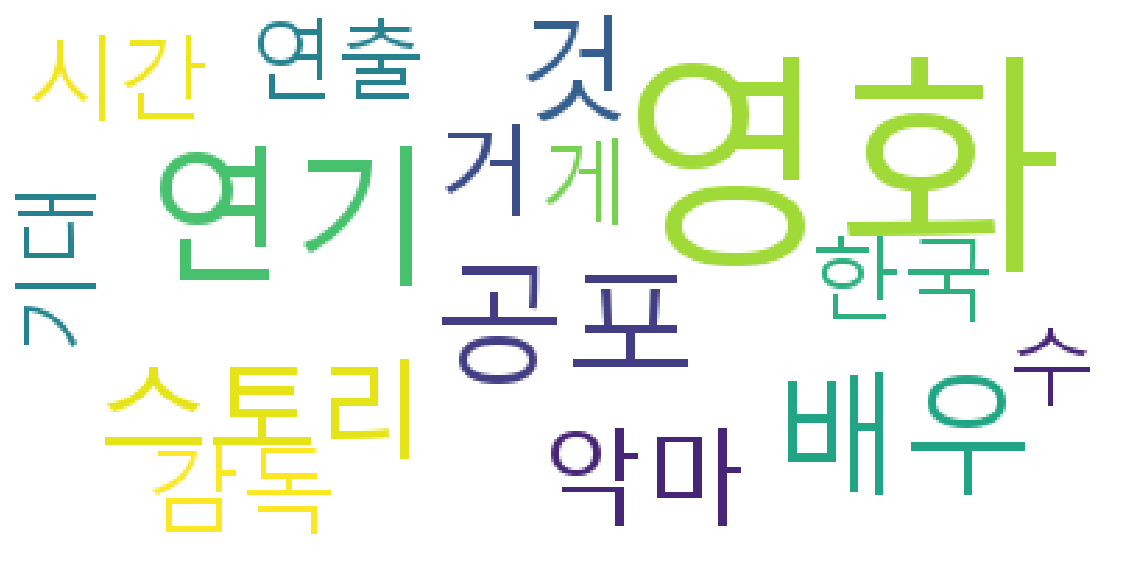

In [177]:
from wordcloud import WordCloud
변신_wc = WordCloud(background_color="white", font_path='c:/Windows/fonts/malgun.ttf')
변신_wc.generate_from_frequencies(변신단어탑)

import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(20, 20)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(변신_wc)

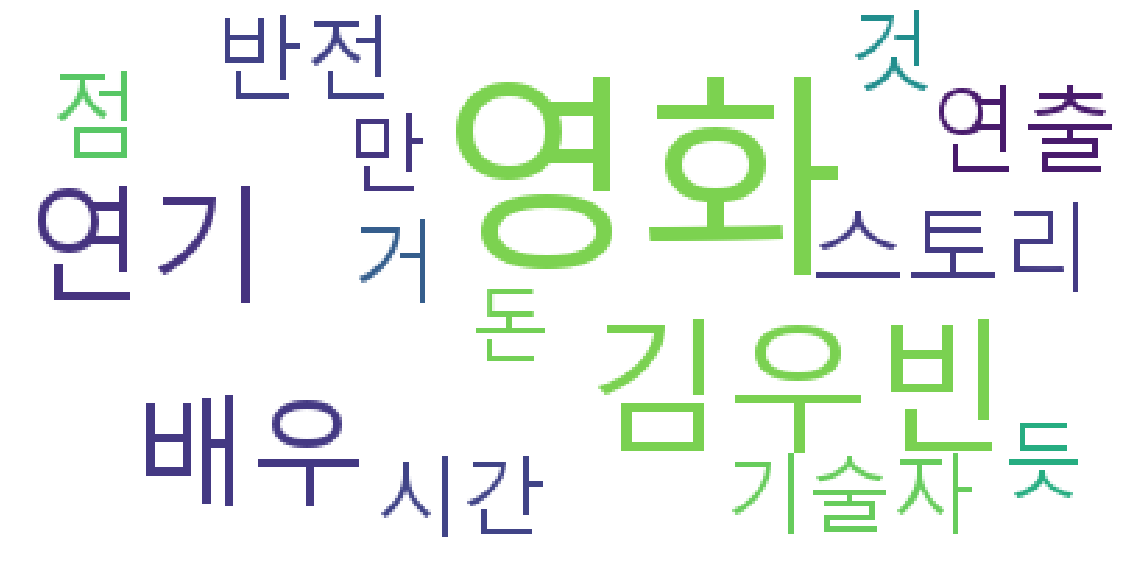

In [178]:
from wordcloud import WordCloud
기술자들_wc = WordCloud(background_color="white", font_path='c:/Windows/fonts/malgun.ttf')
기술자들_wc.generate_from_frequencies(기술자단어탑)

import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(20, 20)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(기술자들_wc)

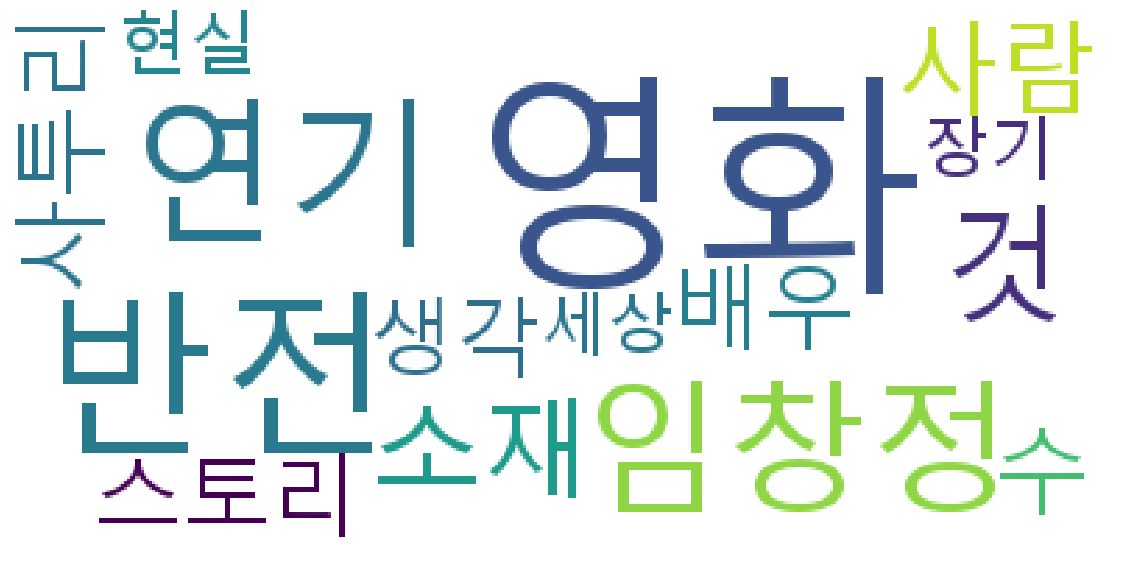

In [179]:
from wordcloud import WordCloud
공모자들_wc = WordCloud(background_color="white", font_path='c:/Windows/fonts/malgun.ttf')
공모자들_wc.generate_from_frequencies(공모자단어탑)

import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(20, 20)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(공모자들_wc)

감상평 문장들을 토큰화하기로 결정!

In [180]:
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer

In [181]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [182]:
okt = Okt()

In [183]:
변신_train = []
for sentence in 변신['감상평']:
    temp_x = []
    temp_x = okt.morphs(sentence, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords]
    변신_train.append(temp_x)

In [184]:
기술자들_train = []
for sentence in 기술자들['감상평']:
    temp_x = []
    temp_x = okt.morphs(sentence, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords]
    기술자들_train.append(temp_x)

In [185]:
공모자들_train = []
for sentence in 공모자들['감상평']:
    temp_x = []
    temp_x = okt.morphs(sentence, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords]
    공모자들_train.append(temp_x)

불행하게도 리스트 항목이라서 join을 통해서 하나로 만들어서 저장하기로 함.

In [186]:
import csv

In [187]:
f = open('변신토큰.txt','w')
for i in range(0, len(변신_train)):
    data = ' '.join(변신_train[i])
    f.write(data)
f.close()

In [188]:
f = open('기술자들토큰.txt','w')
for i in range(0, len(기술자들_train)):
    data = ' '.join(기술자들_train[i])
    f.write(data)
f.close()

In [189]:
f = open('공모자들토큰.txt','w')
for i in range(0, len(공모자들_train)):
    data = ' '.join(공모자들_train[i])
    f.write(data)
f.close()

위의 파일들을 바탕으로 Word2Vec 진행

In [195]:
from gensim.models import Word2Vec

In [196]:
변신파일 = "변신토큰.txt"
변신저장 = "변신word2vec"

In [197]:
corpus1 = [A.strip().split(" ") for A in open(변신파일,'r').readlines()]

In [199]:
변신model = Word2Vec(corpus1, size=50, workers=4, sg=1, hs=1, min_count=6,window=3)
변신model.save(변신저장)

In [200]:
변신model.wv.vocab

{'뭐': <gensim.models.keyedvectors.Vocab at 0x27894eed948>,
 '상당하다': <gensim.models.keyedvectors.Vocab at 0x27894eeda08>,
 '무섭다': <gensim.models.keyedvectors.Vocab at 0x27894eed988>,
 '재밌다': <gensim.models.keyedvectors.Vocab at 0x27894eed9c8>,
 '배우': <gensim.models.keyedvectors.Vocab at 0x27894eeda88>,
 '연기': <gensim.models.keyedvectors.Vocab at 0x27894eedb08>,
 '몰입도': <gensim.models.keyedvectors.Vocab at 0x27894eedb48>,
 '후반': <gensim.models.keyedvectors.Vocab at 0x27894eedb88>,
 '개연': <gensim.models.keyedvectors.Vocab at 0x27894eeda48>,
 '성': <gensim.models.keyedvectors.Vocab at 0x27894eedac8>,
 '로': <gensim.models.keyedvectors.Vocab at 0x27894eedbc8>,
 '아쉽다': <gensim.models.keyedvectors.Vocab at 0x27894eedc08>,
 '왜': <gensim.models.keyedvectors.Vocab at 0x27894eedc48>,
 '지': <gensim.models.keyedvectors.Vocab at 0x27894eedc88>,
 '부터': <gensim.models.keyedvectors.Vocab at 0x27894eedcc8>,
 '을': <gensim.models.keyedvectors.Vocab at 0x27894eedd08>,
 '공포': <gensim.models.keyedvectors.Vocab

In [201]:
기술자들파일 = "기술자들토큰.txt"
기술자들저장 = "기술자들word2vec"

In [202]:
corpus2 = [B.strip().split(" ") for B in open(기술자들파일,'r').readlines()]

In [203]:
기술자들model = Word2Vec(corpus2, size=50, workers=4, sg=1, hs=1, min_count=6,window=3)
기술자들model.save(기술자들저장)

In [204]:
기술자들model.wv.vocab

{'기술자': <gensim.models.keyedvectors.Vocab at 0x27894ef7bc8>,
 '끝': <gensim.models.keyedvectors.Vocab at 0x27894ef7408>,
 '까지': <gensim.models.keyedvectors.Vocab at 0x27894ef7ec8>,
 '같다': <gensim.models.keyedvectors.Vocab at 0x27894f535c8>,
 '반전': <gensim.models.keyedvectors.Vocab at 0x27894f53788>,
 '영화': <gensim.models.keyedvectors.Vocab at 0x27894f53988>,
 '이라': <gensim.models.keyedvectors.Vocab at 0x27894f53a48>,
 '좋다': <gensim.models.keyedvectors.Vocab at 0x27894f53b08>,
 '안': <gensim.models.keyedvectors.Vocab at 0x27894f536c8>,
 '에서': <gensim.models.keyedvectors.Vocab at 0x27894f53848>,
 '되다': <gensim.models.keyedvectors.Vocab at 0x27894f53c48>,
 '고': <gensim.models.keyedvectors.Vocab at 0x27894f53d08>,
 '연': <gensim.models.keyedvectors.Vocab at 0x27894f53f08>,
 '기': <gensim.models.keyedvectors.Vocab at 0x27894f53dc8>,
 '저': <gensim.models.keyedvectors.Vocab at 0x27894efbc48>,
 '볼': <gensim.models.keyedvectors.Vocab at 0x27894efbb88>,
 '만': <gensim.models.keyedvectors.Vocab at 0x2

In [205]:
공모자들파일 = "공모자들토큰.txt"
공모자들저장 = "공모자들word2vec"

In [206]:
corpus3 = [C.strip().split(" ") for C in open(공모자들파일,'r').readlines()]

In [207]:
공모자들model = Word2Vec(corpus3, size=50, workers=4, sg=1, hs=1, min_count=6,window=3)
공모자들model.save(공모자들저장)

In [208]:
공모자들model.wv.vocab

{'볼': <gensim.models.keyedvectors.Vocab at 0x27894f03a08>,
 '만': <gensim.models.keyedvectors.Vocab at 0x27894f03a88>,
 '스릴': <gensim.models.keyedvectors.Vocab at 0x27894f03a48>,
 '반전': <gensim.models.keyedvectors.Vocab at 0x27894f03ac8>,
 '있다': <gensim.models.keyedvectors.Vocab at 0x27894f03b48>,
 '하지만': <gensim.models.keyedvectors.Vocab at 0x27894f03bc8>,
 '억지': <gensim.models.keyedvectors.Vocab at 0x27894f03c08>,
 '결말': <gensim.models.keyedvectors.Vocab at 0x27894f03c48>,
 '대한': <gensim.models.keyedvectors.Vocab at 0x27894f03b08>,
 '로': <gensim.models.keyedvectors.Vocab at 0x27894f03b88>,
 '영화': <gensim.models.keyedvectors.Vocab at 0x27894f03c88>,
 '네': <gensim.models.keyedvectors.Vocab at 0x27894f03d08>,
 '한국': <gensim.models.keyedvectors.Vocab at 0x27894f03d48>,
 '연기': <gensim.models.keyedvectors.Vocab at 0x27894f03d88>,
 '이고': <gensim.models.keyedvectors.Vocab at 0x27894f03e08>,
 '최고': <gensim.models.keyedvectors.Vocab at 0x27894f03e48>,
 '만들다': <gensim.models.keyedvectors.Vocab a

In [209]:
print(변신model.wv.most_similar("연기", topn=5))

[('공포', 0.9991484880447388), ('가다', 0.9990454912185669), ('볼', 0.9990232586860657), ('재밌다', 0.9989936947822571), ('진짜', 0.9989370107650757)]


In [210]:
print(기술자들model.wv.most_similar("연기", topn=5))

[('영화', 0.9975180625915527), ('보다', 0.99721360206604), ('만', 0.9971283674240112), ('적', 0.996762752532959), ('재밌다', 0.9967036247253418)]


In [211]:
print(공모자들model.wv.most_similar("연기", topn=5))

[('잔인하다', 0.999047577381134), ('다', 0.9989469051361084), ('좋다', 0.9989331960678101), ('연출', 0.9989007115364075), ('반전', 0.9988722801208496)]


그림으로 나타내보기

In [213]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in 변신model.wv.vocab:
        vectors.append(변신model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(변신model)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

In [214]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in 기술자들model.wv.vocab:
        vectors.append(기술자들model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(기술자들model)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

In [215]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in 공모자들model.wv.vocab:
        vectors.append(공모자들model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(공모자들model)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

In [217]:
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer

In [471]:
변신.drop_duplicates(subset = ['감상평'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
변신['감상평'] = 변신['감상평'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
변신['감상평'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
변신 = 변신.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(변신))

전처리 후 테스트용 샘플의 개수 : 447


In [470]:
기술자들.drop_duplicates(subset = ['감상평'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
기술자들['감상평'] = 기술자들['감상평'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
기술자들['감상평'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
기술자들 = 기술자들.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(기술자들))

전처리 후 테스트용 샘플의 개수 : 382


In [472]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [473]:
X_train = []
for sentence in 변신['감상평']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [474]:
print(X_train[0:3])

[['뭐', '냐', '게'], ['초반', '불다', '상당하다', '무섭다', '재밌다', '배우', '연기', '상당하다', '뛰어나다', '몰입도', '높다', '후반', '부가', '개연', '성', '억', '지스', '로', '워', '지다', '아쉽다', '왜', '창고', '혼자', '내려보냇는', '지', '부터', '슬슬', '불길하다', '조짐', '을', '느낌', '그래도', '공포', '가뭄', '인', '한국영', '화', '에서', '볼', '만', '작품'], ['한물가다', '액', '소', '시', '즘', '을', '살리다', '보다', '애', '써다', '국내', '공포물', '중', '에서는', '가장', '좋다', '같다', '연출', '연기', '모두', '괜찮다', '영화']]


In [475]:
X_test = []
for sentence in 기술자들['감상평']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [476]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [477]:
print(tokenizer.word_index)

{'영화': 1, '보다': 2, '너무': 3, '무섭다': 4, '을': 5, '연기': 6, '배우': 7, '없다': 8, '진짜': 9, '좋다': 10, '만': 11, '로': 12, '다': 13, '있다': 14, '재밌다': 15, '정말': 16, '같다': 17, '않다': 18, '스토리': 19, '이다': 20, '악마': 21, '연출': 22, '되다': 23, '아니다': 24, '만들다': 25, '게': 26, '안': 27, '감독': 28, '시간': 29, '공포영화': 30, '공포': 31, '자다': 32, '평점': 33, '까지': 34, '에서': 35, '것': 36, '나오다': 37, '적': 38, '부터': 39, '볼': 40, '왜': 41, '아': 42, '고': 43, '최고': 44, '한국': 45, '연기력': 46, '오다': 47, '못': 48, '이렇다': 49, '생각': 50, '변신': 51, '정도': 52, '소재': 53, '아쉽다': 54, '긴장감': 55, '몰입': 56, '나': 57, '가족': 58, '하고': 59, '네': 60, '끝': 61, '때': 62, '가다': 63, '배성우': 64, '뭐': 65, '몰입도': 66, '중': 67, '아깝다': 68, '사람': 69, '점': 70, '그냥': 71, '내': 72, '초반': 73, '더': 74, '사제': 75, '오컬트': 76, '보고': 77, '좋아하다': 78, '인': 79, '많이': 80, '주다': 81, '처음': 82, '말': 83, '재미있다': 84, '괜찮다': 85, '백윤식': 86, '꼭': 87, '요': 88, '구마': 89, '그': 90, '완전': 91, '이렇게': 92, '기대하다': 93, '없이': 94, '함': 95, '버리다': 96, '기': 97, '듯': 98, '모르다': 99, '감': 100, '화': 101, '

In [488]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 1772
등장 빈도가 1번 이하인 희귀 단어의 수: 980
단어 집합에서 희귀 단어의 비율: 55.30474040632054
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 15.279077019020892


In [489]:
vocab_size = total_cnt - rare_cnt + 2

In [490]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)

In [491]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

패딩(길이맞추기)

리뷰의 최대 길이 : 138
리뷰의 평균 길이 : 14.348993288590604


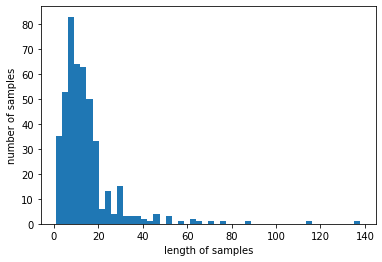

In [492]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [493]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [494]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 92.61744966442953


In [495]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [496]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [497]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [498]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [499]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [500]:
y_train = np.array(변신['label'])
y_test = np.array(기술자들['label'])

In [501]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
6/6 [==============================] - ETA: 0s - loss: 0.6890 - acc: 0.5574
Epoch 00001: val_acc improved from -inf to 0.46667, saving model to best_model.h5
6/6 [==============================] - 1s 117ms/step - loss: 0.6890 - acc: 0.5574 - val_loss: 0.7032 - val_acc: 0.4667
Epoch 2/15
5/6 [========================>.....] - ETA: 0s - loss: 0.6368 - acc: 0.7133
Epoch 00002: val_acc improved from 0.46667 to 0.95556, saving model to best_model.h5
6/6 [==============================] - 0s 35ms/step - loss: 0.6326 - acc: 0.7171 - val_loss: 0.4335 - val_acc: 0.9556
Epoch 3/15
5/6 [========================>.....] - ETA: 0s - loss: 0.7029 - acc: 0.7333
Epoch 00003: val_acc did not improve from 0.95556
6/6 [==============================] - 0s 38ms/step - loss: 0.6737 - acc: 0.7367 - val_loss: 0.5856 - val_acc: 0.6667
Epoch 4/15
5/6 [========================>.....] - ETA: 0s - loss: 0.4671 - acc: 0.8600
Epoch 00004: val_acc did not improve from 0.95556
6/6 [=========================

In [502]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

12/12 [==============================] - 0s 8ms/step - loss: 0.6499 - acc: 0.6099

 테스트 정확도: 0.6099


In [503]:
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.3):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [504]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')

53.21% 확률로 긍정 리뷰입니다.



In [505]:
sentiment_predict('이딴게 영화냐 ㅉㅉ')

48.99% 확률로 긍정 리뷰입니다.



In [506]:
sentiment_predict('연기')

52.79% 확률로 긍정 리뷰입니다.



In [507]:
sentiment_predict('와 개쩐다 정말 세계관 최강자들의 영화다')

63.19% 확률로 긍정 리뷰입니다.



감정분석은 아직 제대로 이해가 되지 않아서 코드만 붙여서 사용을 했습니다.
한글어의 경우 전처리가 매우 중요하다는 생각이 들었고, 차후 복습을 하면서 조금 더 연습을 해봐야 할 것 같습니다.